# Instacart Exploratory Data Analysis

In [51]:
# some important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

# Read the Datasets

In [52]:
#“The Instacart Online Grocery Shopping Dataset 2017”,
#Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on <4/2/2019>

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [53]:
print("aisles", aisles.shape)
print("departmets", departments.shape)
print("order_products__prior", order_products__prior.shape, "32 million")
print("order_products__train", order_products__train.shape, "1 million")
print("orders", orders.shape, "3 million")
print("products", products.shape, "50 thousands")
print("sample_submission", sample_submission.shape)

aisles (134, 2)
departmets (21, 2)
order_products__prior (32434489, 4) 32 million
order_products__train (1384617, 4) 1 million
orders (3421083, 7) 3 million
products (49688, 4) 50 thousands
sample_submission (75000, 2)


In [54]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [55]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [56]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [57]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [58]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [59]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [60]:
# merging the 3 tables; products, aisles and departments together in one table productso

productso = products.merge(aisles, on = 'aisle_id', how = 'inner')
productso = productso.merge(departments, on = 'department_id', how = 'inner')

In [61]:
productso.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


Text(0, 0.5, 'Number of Products')

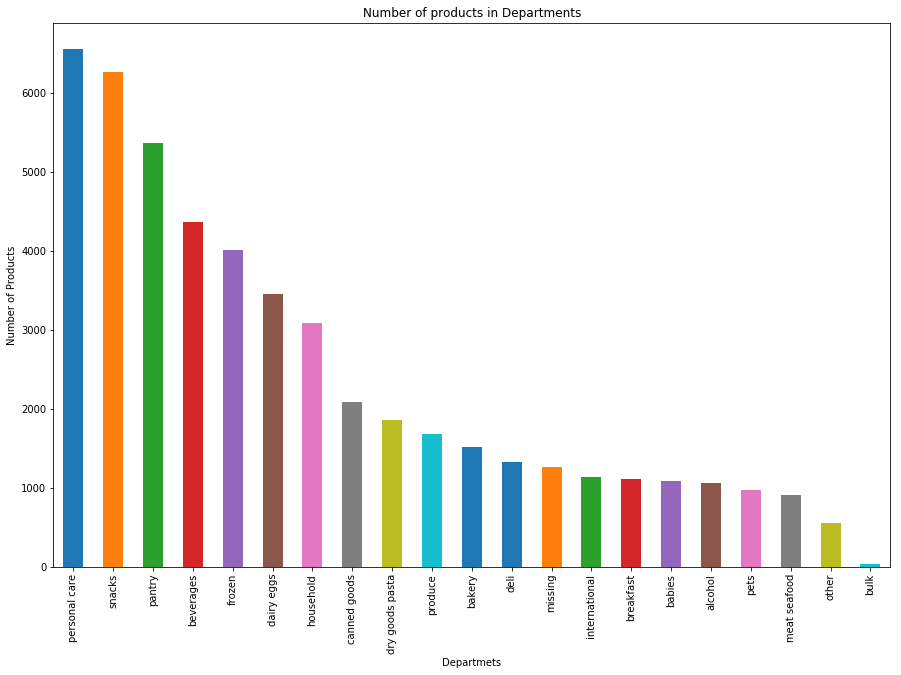

In [62]:
plot = productso['department'].value_counts().plot(kind='bar', figsize=(15,10),
                                    title = 'Number of products in Departments')


plot.set_xlabel('Departmets')
plot.set_ylabel('Number of Products')

Text(0, 0.5, 'Number of Products')

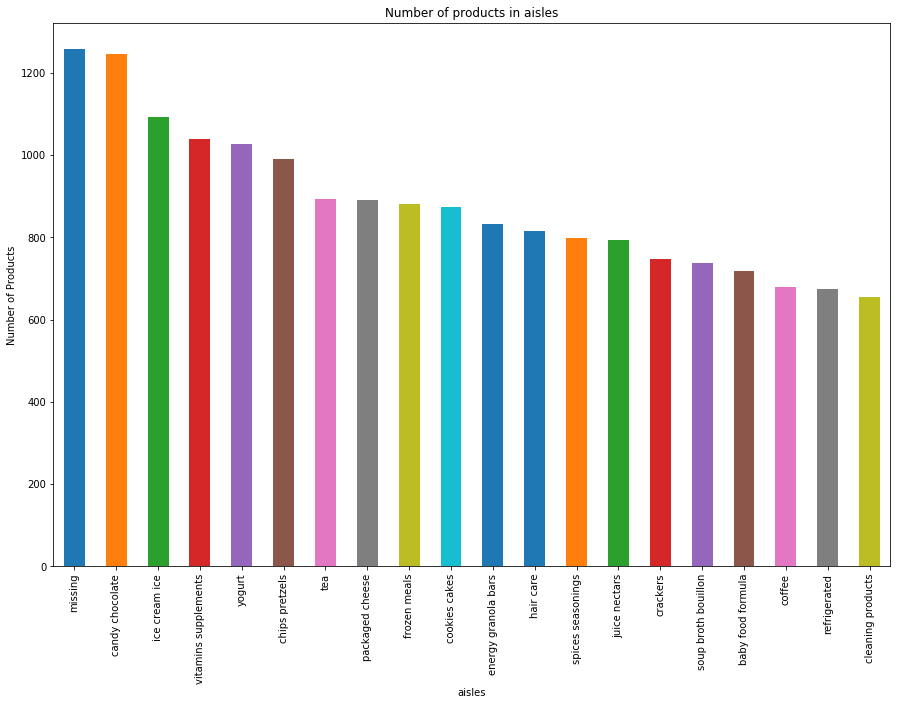

In [63]:
plot = productso['aisle'].value_counts().head(20).plot(kind='bar', figsize=(15,10),
                                    title = 'Number of products in aisles')


plot.set_xlabel('aisles')
plot.set_ylabel('Number of Products')

In [64]:
# fig, ax = plt.subplots(figsize = (15,10))
# g = sns.countplot(x = 'department', data = productso)

# for item in g.get_xticklabels():
#     item.set_rotation(70)

In [65]:
# fig, ax = plt.subplots(figsize = (30,10))
# g = sns.countplot(x = 'aisle', data = productso)

# for item in g.get_xticklabels():
#     item.set_rotation(90)

In [66]:
# personal_care = productso['department'] == 'personal care'
# personal_care = productso[personal_care]

In [67]:
# personal_care.head()

In [68]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [69]:
dmap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
orders['dow_name'] = orders['order_dow'].map(dmap)
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,dow_name
0,2539329,1,prior,1,2,8,NaN,Wednesday
1,2398795,1,prior,2,3,7,15.0,Thursday
2,473747,1,prior,3,3,12,21.0,Thursday
3,2254736,1,prior,4,4,7,29.0,Friday
4,431534,1,prior,5,4,15,28.0,Friday


Text(0, 0.5, 'Number of orders')

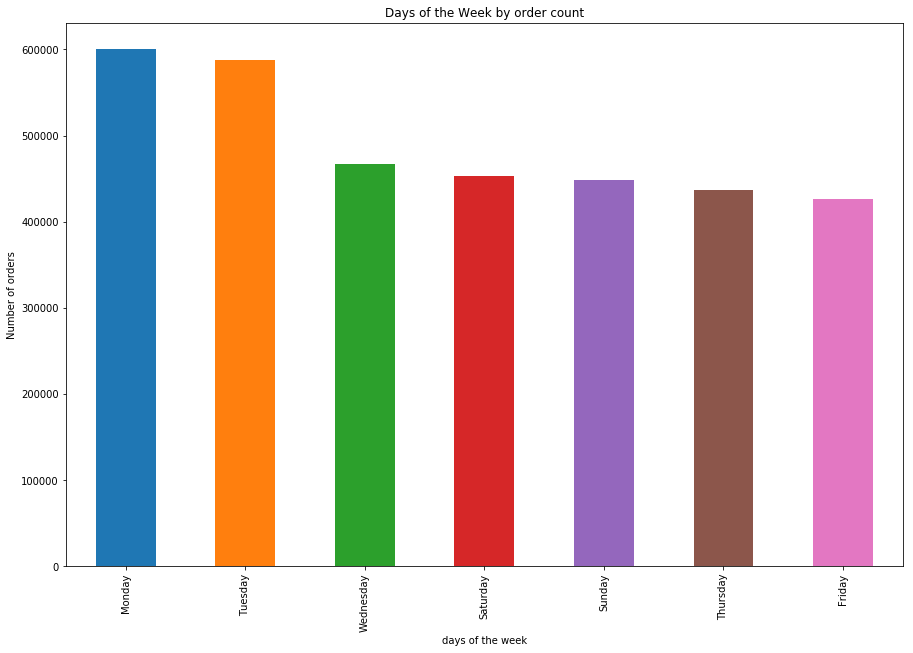

In [70]:
plot = orders['dow_name'].value_counts().plot(kind='bar', figsize=(15,10),
                                    title = 'Days of the Week by order count')


plot.set_xlabel('days of the week')
plot.set_ylabel('Number of orders')

In [71]:
orders['order_hour_of_day'].unique()

array([ 8,  7, 12, 15,  9, 14, 16, 11, 10, 19, 18, 17, 13, 20,  0, 21, 22,
        5, 23,  4,  6,  1,  2,  3], dtype=int64)

In [72]:
x = (orders['order_hour_of_day'] >= 12) & (orders['order_hour_of_day'] < 18)
orders['time_of_day'] = orders['order_hour_of_day'][x]

In [73]:
orders['time_of_day'][x] = 'Afternoon'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
y = ((orders['order_hour_of_day'] >= 18) & (orders['order_hour_of_day'] <= 23)) | (orders['order_hour_of_day'] == 0)

In [75]:
orders['time_of_day'][y] = 'Evening'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
z = (orders['order_hour_of_day'] > 0) & (orders['order_hour_of_day'] < 12)

In [77]:
orders['time_of_day'][z] = 'Morning'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of orders')

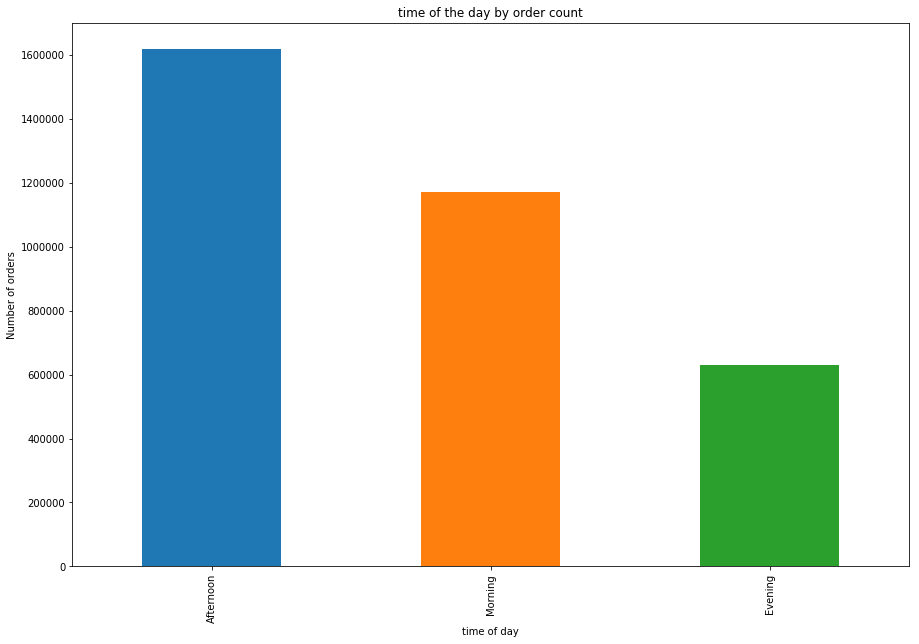

In [78]:
plot = orders['time_of_day'].value_counts().plot(kind='bar', figsize=(15,10),
                                    title = 'time of the day by order count')


plot.set_xlabel('time of day')
plot.set_ylabel('Number of orders')

Text(0, 0.5, 'Number of orders')

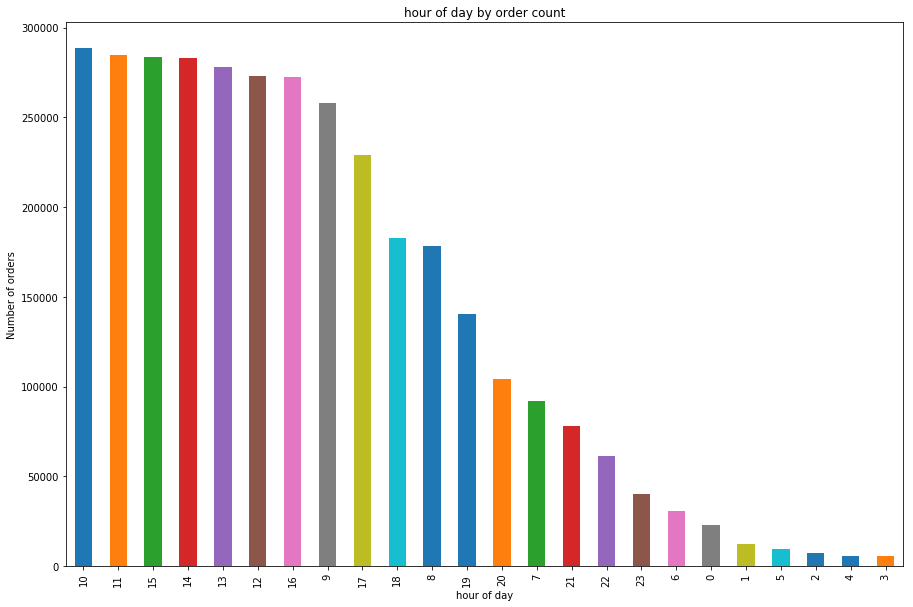

In [79]:
plot = orders['order_hour_of_day'].value_counts().plot(kind='bar', figsize=(15,10),
                                    title = 'hour of day by order count')


plot.set_xlabel('hour of day')
plot.set_ylabel('Number of orders')

In [80]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,dow_name,time_of_day
0,2539329,1,prior,1,2,8,NaN,Wednesday,Morning
1,2398795,1,prior,2,3,7,15.0,Thursday,Morning
2,473747,1,prior,3,3,12,21.0,Thursday,Afternoon
3,2254736,1,prior,4,4,7,29.0,Friday,Morning
4,431534,1,prior,5,4,15,28.0,Friday,Afternoon


In [81]:
orders_user = orders.groupby('user_id').count()

In [82]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,dow_name,time_of_day
0,2539329,1,prior,1,2,8,NaN,Wednesday,Morning
1,2398795,1,prior,2,3,7,15.0,Thursday,Morning
2,473747,1,prior,3,3,12,21.0,Thursday,Afternoon
3,2254736,1,prior,4,4,7,29.0,Friday,Morning
4,431534,1,prior,5,4,15,28.0,Friday,Afternoon


In [83]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [84]:
orderso = orders.merge(order_products__prior, on = 'order_id', how = 'inner')

In [85]:
orderso.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,dow_name,time_of_day,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,196,1,0
1,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,14084,2,0
2,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,12427,3,0
3,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,26088,4,0
4,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,26405,5,0


In [86]:
productso.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


In [87]:
insta_cart = orderso.merge(productso, on = 'product_id', how = 'inner')

In [88]:
insta_cart = insta_cart[0:500000]

In [89]:
insta_cart.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,dow_name,time_of_day,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,Thursday,Morning,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,Thursday,Afternoon,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,Friday,Morning,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,Friday,Afternoon,196,1,1,Soda,77,7,soft drinks,beverages


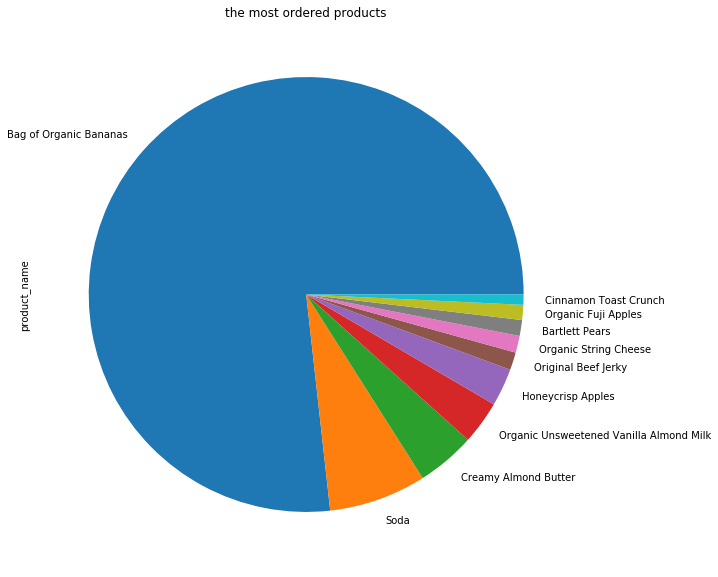

In [90]:
insta_cart['product_name'].value_counts().head(10).plot(kind='pie', figsize=(15,10),
                                    title = 'the most ordered products')

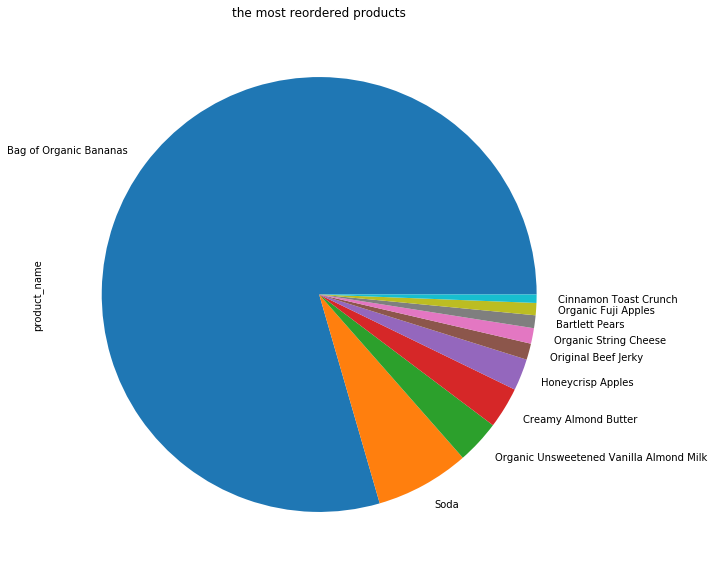

In [91]:
insta_cart[insta_cart['reordered'] == 1]['product_name'].value_counts().head(10).plot(kind='pie', figsize=(15,10),
                                    title = 'the most reordered products')

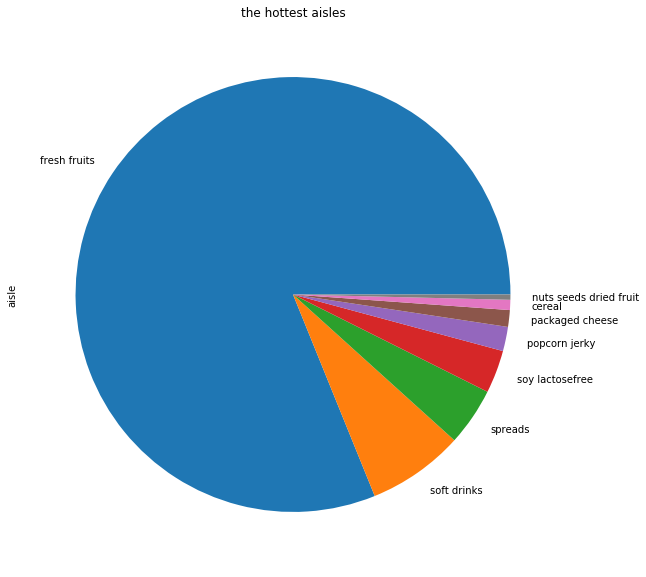

In [92]:
insta_cart['aisle'].value_counts().head(8).plot(kind='pie', figsize=(15,10),
                                    title = 'the hottest aisles')

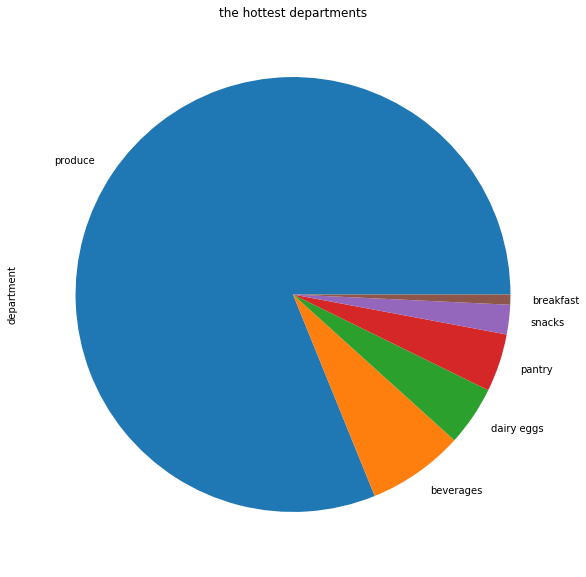

In [93]:
insta_cart['department'].value_counts().head(6).plot(kind='pie', figsize=(15,10),
                                    title = 'the hottest departments')

In [94]:
insta_cart.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,dow_name,time_of_day,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,Wednesday,Morning,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,Thursday,Morning,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,Thursday,Afternoon,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,Friday,Morning,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,Friday,Afternoon,196,1,1,Soda,77,7,soft drinks,beverages


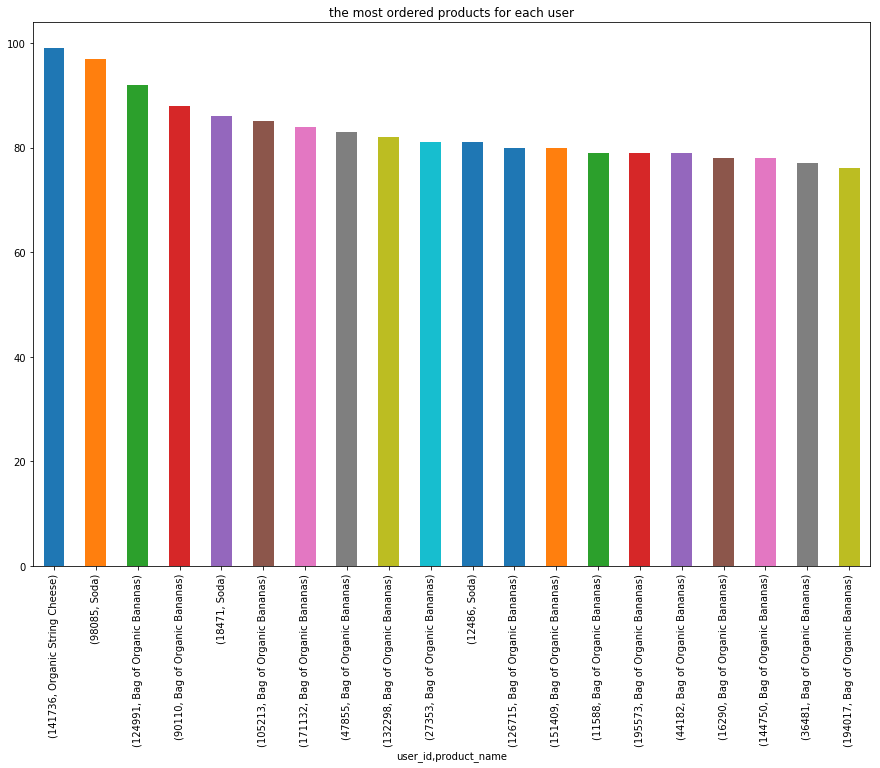

In [95]:
insta_cart.groupby(['user_id', 'product_name'])['order_dow'].count().sort_values(ascending = False).head(20).plot(kind='bar', figsize=(15,10),
                                    title = 'the most ordered products for each user')

In [122]:
users = insta_cart.groupby(['user_id', 'department']).count()['order_id']
userso = users.groupby(level = 0).apply(lambda x: (x / float(x.sum()))*100)

In [123]:
userso

user_id  department
1        beverages      19.607843
         breakfast       5.882353
         dairy eggs     17.647059
         household       3.921569
         pantry          1.960784
         produce         9.803922
         snacks         41.176471
2        produce       100.000000
7        produce       100.000000
11       produce       100.000000
12       produce       100.000000
14       produce       100.000000
15       beverages      33.333333
         snacks         66.666667
19       beverages     100.000000
21       beverages     100.000000
22       produce       100.000000
27       produce       100.000000
28       produce       100.000000
31       beverages     100.000000
37       pantry        100.000000
39       pantry        100.000000
40       produce       100.000000
41       produce       100.000000
42       produce       100.000000
43       beverages     100.000000
50       produce       100.000000
51       produce       100.000000
52       beverages      53.8